In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_50411_I')

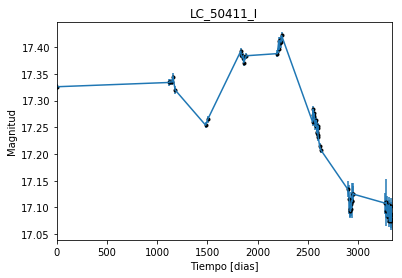

In [2]:
data = np.genfromtxt('LC_50411_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_50411_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

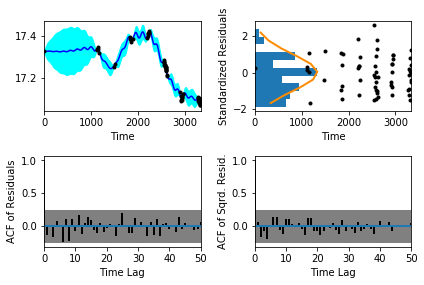

In [5]:
sample.assess_fit()

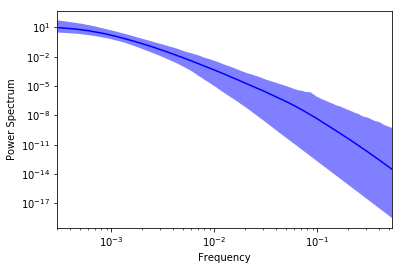

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_50411_I')

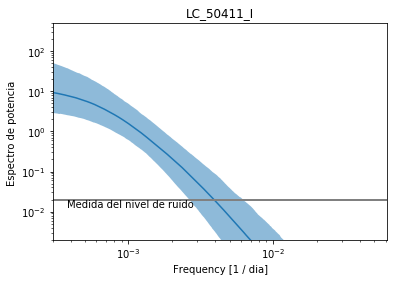

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_50411_I')

Text(0.5,1,'Prediccion , valor esperado LC_50411_I')

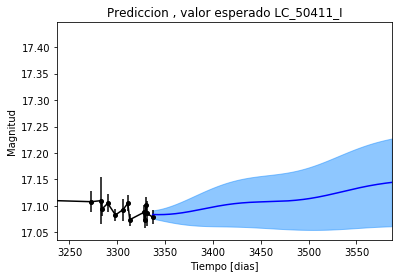

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_50411_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_50411_I')

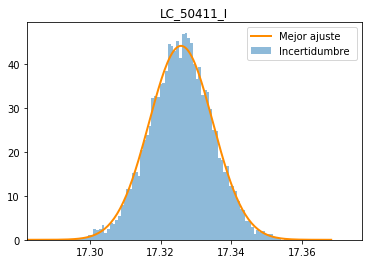

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_50411_I')

Text(0.5,1,'Interpolacion, camino simulado LC_50411_I')

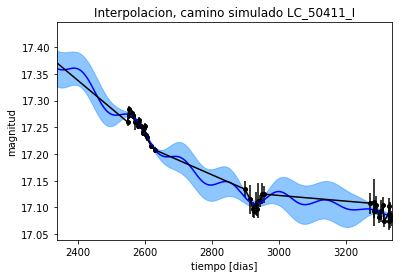

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50411_I')

Text(0.5,1,'Interpolacion, camino simulado LC_50411_I')

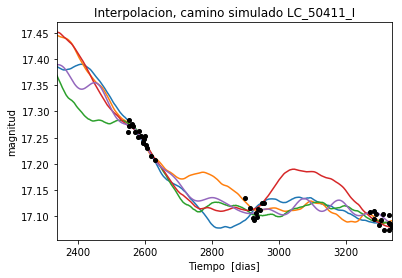

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50411_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 730.832799239
Median: 0.0170197882165
Standard deviation: 0.208716078327
68% credibility interval: [ 0.00106307  0.23676984]
95% credibility interval: [  3.64541266e-04   8.10867475e-01]
99% credibility interval: [  3.18580237e-04   9.91709627e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 866.554333926
Median: 0.0010520434034
Standard deviation: 0.0552785089907
68% credibility interval: [ 0.00040194  0.01088683]
95% credibility interval: [ 0.00031211  0.14149601]
99% credibility interval: [  3.02162338e-04   3.89796702e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 674.148174813
Median: 0.0128694498683
Standard d

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1258.51097414
Median: 191.654030711
Standard deviation: 1.66908318041
68% credibility interval: [ 189.78038013  192.8633235 ]
95% credibility interval: [ 187.3456601   193.56883762]
99% credibility interval: [ 185.2745563   194.10716181]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 683.884696848
Median: 0.80803831312
Standard deviation: 2.09722136593
68% credibility interval: [ 0.0488275   4.08433165]
95% credibility interval: [ 0.01229277  6.80269679]
99% credibility interval: [ 0.00924576  9.09461047]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 521.87558127
Median: 0.247042607266
Standard deviation: 6.38288510445
68% credibility interval: [ 0.01241633  3.25769509]
95% credibility interval: [  1.21487374e-03 

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 802.22435375
Median: 1.29591929525e-48
Standard deviation: 2.36138172859e+77
68% credibility interval: [  1.82501567e-96   9.32674301e-10]
95% credibility interval: [  1.41132090e-228   2.76860677e+000]
99% credibility interval: [  3.94259617e-241   3.54674645e+070]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2908.71349512
Median: 17.2658029671
Standard deviation: 0.0776251751496
68% credibility interval: [ 17.19720751  17.32542395]
95% credibility interval: [ 17.09525521  17.41899976]
99% credibility interval: [ 16.98713343  17.50491843]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 835.684371964
Median: 0.0
Standard deviation: 0.185728433314
68% credibility interval: [ 0.          0.10639081]
95% credibility interval: [ 0.          0.73303573]
99% credibility interval: [ 0.          0.98344515]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 835.684371964
Median: 0.0
Standard deviation: 0.185728433314
68% credibility interval: [ 0.          0.10639081]
95% credibility interval: [ 0.          0.73303573]
99% credibility interval: [ 0.          0.98344515]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 716.262368597
Median: 0.0
Standard deviation: 0.000188579684153
68% credibility interval: [ 0.

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1258.51097414
Median: 191.654030711
Standard deviation: 1.66908318041
68% credibility interval: [ 189.78038013  192.8633235 ]
95% credibility interval: [ 187.3456601   193.56883762]
99% credibility interval: [ 185.2745563   194.10716181]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1236.03059863
Median: 0.0155925022691
Standard deviation: 0.0209718126447
68% credibility interval: [ 0.00919503  0.03207074]
95% credibility interval: [ 0.00588477  0.07582068]
99% credibility interval: [ 0.00456654  0.13406266]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1668.48037106
Median: 1.00573558227
Standard deviation: 0.165124279901
68% credibility interval: [ 0.86901045  1.18860021]
95% credibility interval: [ 0.7464693   1.39472302]
99% credibility interval: [ 0.68659236  1.55118725]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 632.704854429
Median: 2.2014169838e-05
Standard deviation: 0.000747649636678
68% credibility interval: [  8.19097699e-07   3.14064544e-04]
95% credibility interval: [  4.09137847e-08   2.48455808e-03]
99% credibility interval: [  5.22439889e-75   4.60798646e-03]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 730.832799239
Median: (-0.106938483253-2.10101045777j)
Standard deviation: 1.75544430238
68% credibility interval: [-1.48766878+0.j         -0.00667947-0.00587025j]
95% credibility interval: [ -5.09483060e+00+0.j          -2.29048032e-03-0.00521112j]
99% credibility interval: [ -6.23109536e+00+0.j          -2.00169867e-03-0.03939287j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 866.554333926
Median: (-0.00661018365479+0j)
Standard deviation: 1.21755688253
68% credibility interval: [-0.06840400+0.0619083j -0.00252544+0.j       ]
95% credibility interval: [-0.88904565+6.17916809j -0.00196103+0.j        ]
99% credibility interval: [ -2.44916491e+00+5.07706913j  -1.89854196e-03+0.j        ]
Posterior summary for parame